In [2]:
import pandas as pd
from sklearn import (svm, preprocessing)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (recall_score, precision_score, accuracy_score, confusion_matrix)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier


from sklearn.tree import DecisionTreeClassifier


import matplotlib.pyplot as plt

import seaborn as sns

import collections
import numpy as np
from sklearn.decomposition import PCA

In [4]:
train_data = pd.read_csv(r"C:\Users\Masoud\Desktop\11\Train.csv")
test_data = pd.read_csv(r"C:\Users\Masoud\Desktop\11\Test.csv")

In [5]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10397 entries, 0 to 10396
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Collision Reference No.                 10397 non-null  int64  
 1   Policing Area                           10054 non-null  object 
 2   Collision Severity                      10397 non-null  int64  
 3   Weekday of Collision                    10397 non-null  object 
 4   Day of Collision                        10397 non-null  int64  
 5   Month of Collision                      10397 non-null  int64  
 6   Hour of Collision (24 hour)             10091 non-null  float64
 7   Carriageway Type                        10397 non-null  int64  
 8   Speed Limit                             10397 non-null  int64  
 9   Junction Detail                         10089 non-null  float64
 10  Junction Control                        10087 non-null  fl

In [6]:
train_data.head(10)

,Collision Reference No.,Policing Area,Collision Severity,Weekday of Collision,Day of Collision,Month of Collision,Hour of Collision (24 hour),Carriageway Type,Speed Limit,Junction Detail,Junction Control,Pedestrian Crossing – Human Control,Pedestrian Crossing – Physical Control,Light Conditions,Weather Conditions,Road Surface Conditions,Special Conditions at Site
0,3518,CREA,3,MON,4,8,14.0,13,60,1.0,1.0,1.0,1.0,2,9,9.0,1.0
1,10557,BELC,3,SAT,8,8,17.0,11,50,12.0,7.0,1.0,1.0,4,3,1.0,1.0
2,5002,LISB,3,WED,5,11,17.0,1,60,12.0,7.0,1.0,1.0,2,2,2.0,1.0
3,11714,BELC,3,SUN,18,10,16.0,12,70,6.0,NaN,1.0,1.0,1,3,1.0,1.0
4,12416,MIDU,3,MON,23,11,9.0,13,60,6.0,7.0,1.0,1.0,2,3,1.0,1.0
5,558,FOYL,2,MON,3,2,12.0,13,60,1.0,1.0,1.0,1.0,2,2,2.0,1.0
6,7372,ANTN,2,MON,26,1,16.0,13,40,6.0,7.0,1.0,1.0,1,1,2.0,5.0
7,11825,ARBC,3,SAT,24,10,11.0,13,60,10.0,7.0,1.0,1.0,1,10,2.0,NaN
8,7656,ARBC,3,TUE,10,2,15.0,1,30,NaN,1.0,1.0,1.0,1,3,1.0,1.0
9,5582,NABB,3,FRI,5,12,8.0,13,30,1.0,1.0,1.0,2.0,7,10,1.0,1.0


In [7]:
train_data["Collision Severity"].value_counts()

3    9282
2     993
1     122
Name: Collision Severity, dtype: int64

In [8]:
test_data.head(5)

,Collision Reference No.,Policing Area,Weekday of Collision,Day of Collision,Month of Collision,Hour of Collision (24 hour),Carriageway Type,Speed Limit,Junction Detail,Junction Control,Pedestrian Crossing – Human Control,Pedestrian Crossing – Physical Control,Light Conditions,Weather Conditions,Road Surface Conditions,Special Conditions at Site
0,2,BELW,WED,1,1,0.0,13,30,3.0,7.0,1.0,2.0,5,1,2.0,1.0
1,18,LARN,WED,1,1,17.0,11,70,10.0,7.0,1.0,1.0,7,1,1.0,1.0
2,20,FOYL,WED,1,1,22.0,1,30,6.0,3.0,1.0,11.0,7,9,1.0,1.0
3,26,NaN,THU,2,1,1.0,13,30,12.0,7.0,1.0,1.0,3,10,2.0,1.0
4,29,FOYL,THU,2,1,14.0,13,40,1.0,1.0,1.0,1.0,1,1,1.0,1.0


In [9]:
test_data["Policing Area"].value_counts()

BELC    229
DCST     95
LISC     93
NEMD     78
BELS     70
ARBC     68
ARND     65
MIDU     61
ANTN     61
FOYL     56
CCGL     56
FERO     56
LISB     55
BELN     52
NEWM     51
BELE     47
MEAN     46
BELW     44
CRAI     43
NABB     40
DOWN     37
FERM     34
BMEN     32
DAST     30
ANTR     30
NDOW     30
CREA     26
COLE     26
ARDS     22
OMAG     22
ARMA     20
BMON     17
STRB     15
LIMA     14
CFER     13
BANB     13
MFEL     12
MOYL     10
LARN     10
COOK      9
Name: Policing Area, dtype: int64

In [10]:
train_data.isnull().sum()

Collision Reference No.                     0
Policing Area                             343
Collision Severity                          0
Weekday of Collision                        0
Day of Collision                            0
Month of Collision                          0
Hour of Collision (24 hour)               306
Carriageway Type                            0
Speed Limit                                 0
Junction Detail                           308
Junction Control                          310
Pedestrian Crossing – Human Control       331
Pedestrian Crossing – Physical Control    309
Light Conditions                            0
Weather Conditions                          0
Road Surface Conditions                   317
Special Conditions at Site                302
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# lable encoder for data_train

le.fit(train_data['Weekday of Collision'])
train_data['Weekday of Collision'] = le.transform(train_data['Weekday of Collision'])
le.fit(train_data['Policing Area'].astype(str))
train_data['Policing Area'] = le.transform(train_data['Policing Area'].astype(str))

In [13]:
train_data.isnull().sum()

Collision Reference No.                     0
Policing Area                               0
Collision Severity                          0
Weekday of Collision                        0
Day of Collision                            0
Month of Collision                          0
Hour of Collision (24 hour)               306
Carriageway Type                            0
Speed Limit                                 0
Junction Detail                           308
Junction Control                          310
Pedestrian Crossing – Human Control       331
Pedestrian Crossing – Physical Control    309
Light Conditions                            0
Weather Conditions                          0
Road Surface Conditions                   317
Special Conditions at Site                302
dtype: int64

In [14]:
train_data = train_data.fillna(train_data.median())

In [15]:
# lable encoder for data_test

le.fit(test_data['Weekday of Collision'])
test_data['Weekday of Collision'] = le.transform(test_data['Weekday of Collision'])
le.fit(test_data['Policing Area'].astype(str))
test_data['Policing Area'] = le.transform(test_data['Policing Area'].astype(str))

In [16]:
test_data = test_data.fillna(test_data.median())

In [17]:
y = train_data["Collision Severity"]
x = train_data.drop(["Collision Severity", "Collision Reference No."], axis=1)

data_test_x = test_data.drop(["Collision Reference No."], axis=1)

In [18]:
data_test_x.shape

(1833, 15)

In [19]:
x.shape

(10397, 15)

In [20]:
x.head(10)

,Policing Area,Weekday of Collision,Day of Collision,Month of Collision,Hour of Collision (24 hour),Carriageway Type,Speed Limit,Junction Detail,Junction Control,Pedestrian Crossing – Human Control,Pedestrian Crossing – Physical Control,Light Conditions,Weather Conditions,Road Surface Conditions,Special Conditions at Site
0,11,1,4,8,14.0,13,60,1.0,1.0,1.0,1.0,2,9,9.0,1.0
1,38,2,8,8,17.0,11,50,12.0,7.0,1.0,1.0,4,3,1.0,1.0
2,21,6,5,11,17.0,1,60,12.0,7.0,1.0,1.0,2,2,2.0,1.0
3,38,3,18,10,16.0,12,70,6.0,4.0,1.0,1.0,1,3,1.0,1.0
4,26,1,23,11,9.0,13,60,6.0,7.0,1.0,1.0,2,3,1.0,1.0
5,18,1,3,2,12.0,13,60,1.0,1.0,1.0,1.0,2,2,2.0,1.0
6,0,1,26,1,16.0,13,40,6.0,7.0,1.0,1.0,1,1,2.0,5.0
7,12,2,24,10,11.0,13,60,10.0,7.0,1.0,1.0,1,10,2.0,1.0
8,12,5,10,2,15.0,1,30,6.0,1.0,1.0,1.0,1,3,1.0,1.0
9,28,0,5,12,8.0,13,30,1.0,1.0,1.0,2.0,7,10,1.0,1.0


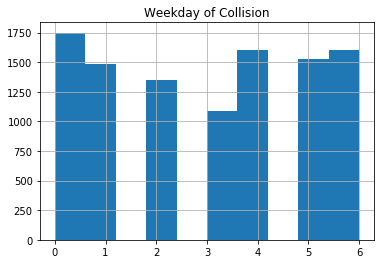

In [21]:
train_data.hist(column="Weekday of Collision")
plt.show()

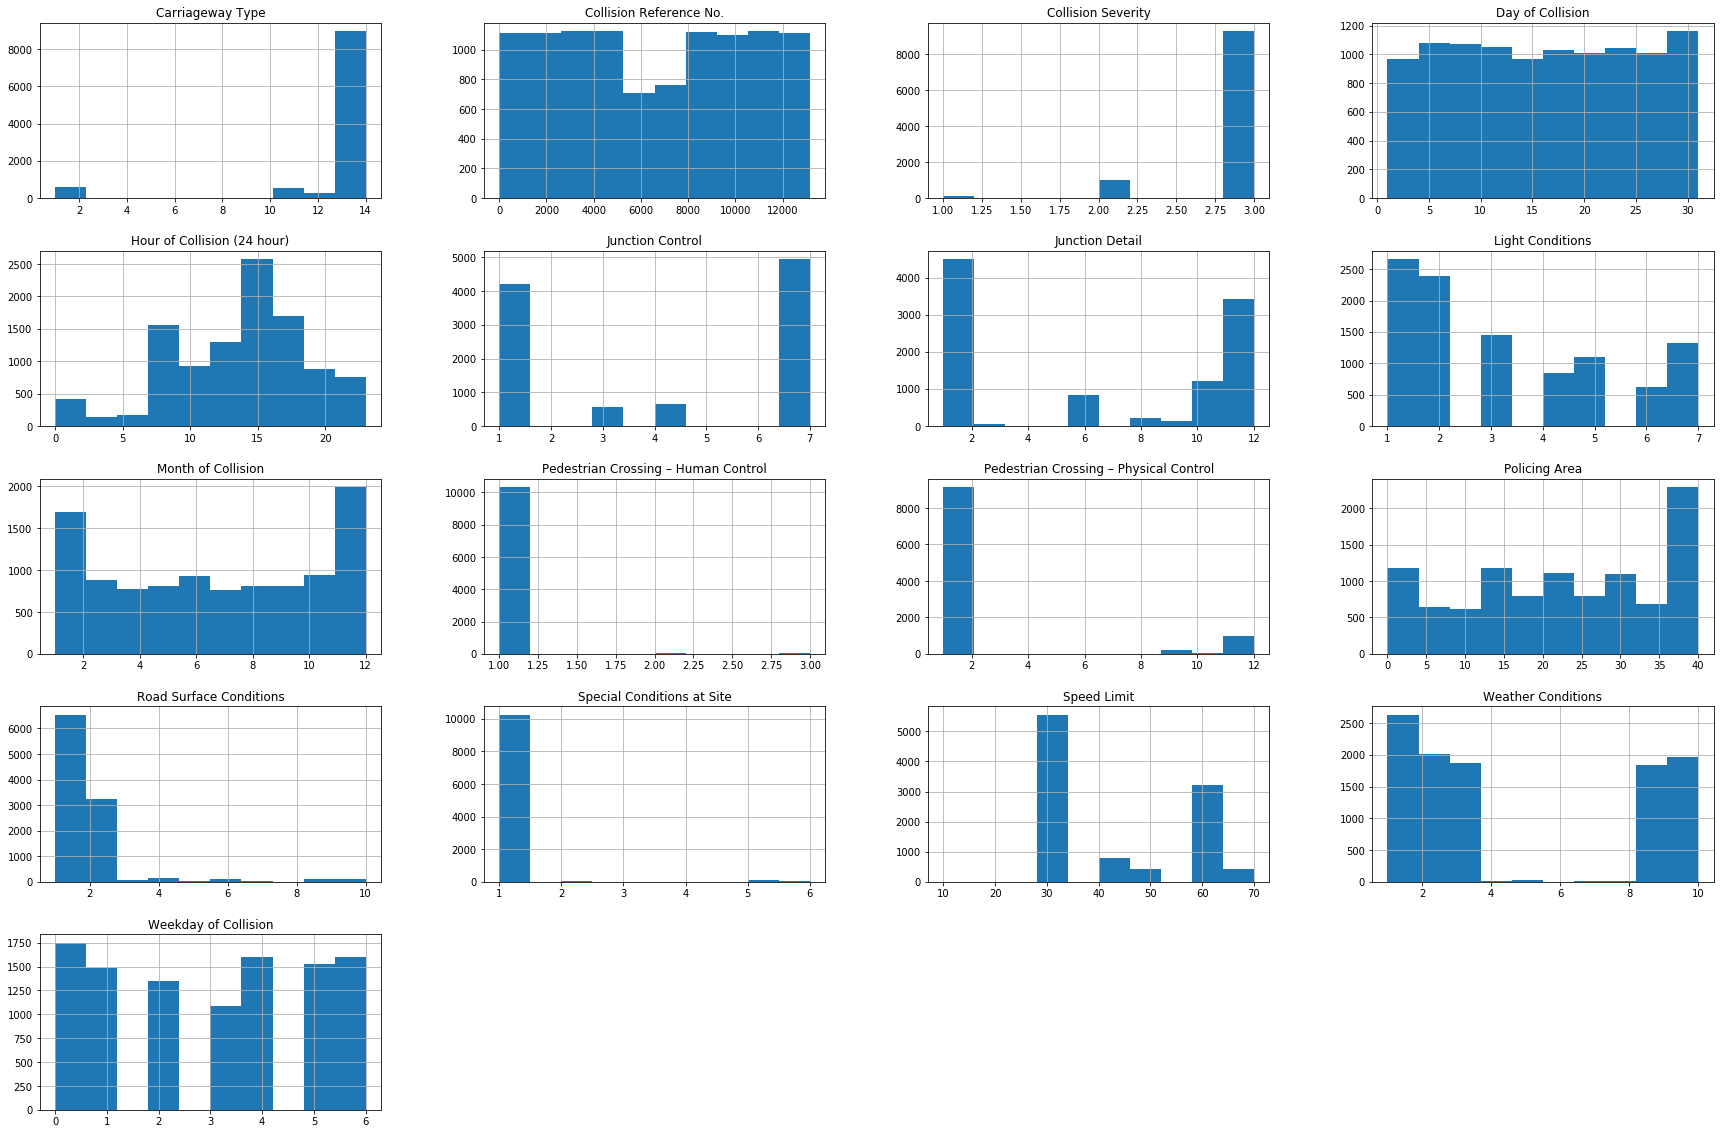

In [22]:
train_data.hist(figsize=(30,20))
plt.show()

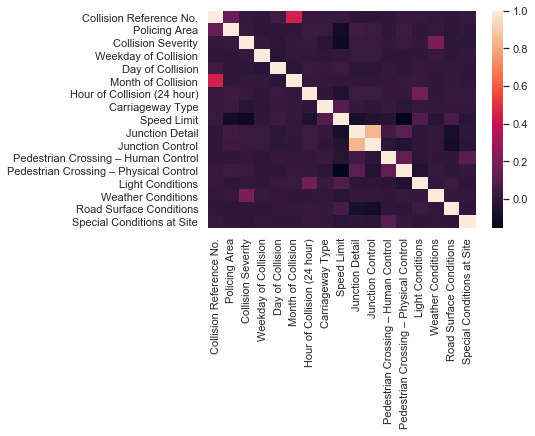

In [23]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.heatmap(train_data.corr())
plt.show()

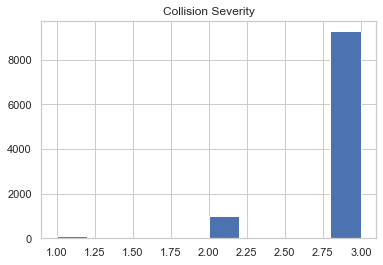

In [24]:
train_data.hist(column="Collision Severity")
plt.show()

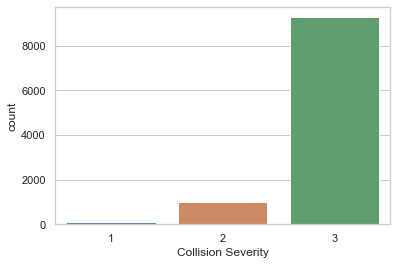

In [25]:
sns.countplot(x="Collision Severity", data=train_data)
plt.show()

In [26]:
# splitting 
data_variables = train_test_split(x, y, test_size = 0.25, random_state = 42)

x_train, x_test, y_train, y_test = data_variables

scaler = preprocessing.StandardScaler().fit(x_train)
train_data_scaled = scaler.transform(x_train)
test_data_scaled = scaler.transform(x_test)

test_data_scaled_x = scaler.transform(data_test_x)

In [32]:
!pip install xgboost

In [37]:
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [36]:
classifier = XGBClassifier()
classifier.fit(train_data_scaled, y_train)



# Predicting test data with train data using classifier
predict_y = classifier.predict(test_data_scaled)

#print(type(predict_y))
a = np.array(predict_y)
print(collections.Counter(a))

accuracy = classifier.score(test_data_scaled, y_test)

precision = precision_score(y_test, predict_y, average='micro')
recall = recall_score(y_test, predict_y, average='micro')

cmatrix = confusion_matrix(y_test, predict_y)
#print("accuracy  : {}".format(accuracy))
print("accuracy[round]  : {}".format(round(accuracy, 3)))
print("precision : {}".format(precision))
print("recall    : {} \n".format(recall))
print("Confusion matrix \n{}\n\n".format(cmatrix))

Counter({3: 2455, 2: 143, 1: 2})
accuracy[round]  : 0.895
precision : 0.895
recall    : 0.895 

Confusion matrix 
[[   1   15   18]
 [   1   58  169]
 [   0   70 2268]]




In [38]:
#with XGBooost algo

xgboost = XGBClassifier()
xgboost.fit(train_data_scaled, y_train)
Y_pred = xgboost.predict(test_data_scaled)
a = np.array(Y_pred)
predict_xgboost = collections.Counter(a)
acc_xgboost = round(xgboost.score(test_data_scaled, y_test) * 100, 2)
#acc_xgboost
print("Accuracy with XGBoost : {}".format(acc_xgboost))

Accuracy with XGBoost : 89.5


In [39]:
#with decision tree- gini index

decision_tree = DecisionTreeClassifier(min_samples_leaf=1, max_depth=4, criterion= "gini")
decision_tree.fit(train_data_scaled, y_train)
Y_pred = decision_tree.predict(test_data_scaled)
a = np.array(Y_pred)
predict_decision_tree = collections.Counter(a)
acc_decision_tree = round(decision_tree.score(test_data_scaled, y_test) * 100, 2)
#acc_decision_tree
print("Accuracy with Decision Tree_Gini : {}".format(acc_decision_tree))

Accuracy with Decision Tree_Gini : 89.88


In [40]:
#with decisiono tree- entropy

decision_tree = DecisionTreeClassifier(min_samples_leaf=1, max_depth=4, criterion= "entropy")
decision_tree.fit(train_data_scaled, y_train)
Y_pred = decision_tree.predict(test_data_scaled)
a = np.array(Y_pred)
predict_decision_tree = collections.Counter(a)
acc_decision_tree = round(decision_tree.score(test_data_scaled, y_test) * 100, 2)
#acc_decision_tree
print("Accuracy with Decision Tree_entropy : {}".format(acc_decision_tree))

Accuracy with Decision Tree_entropy : 90.46


In [41]:
#with random forest n=100

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_data_scaled, y_train)
Y_pred = random_forest.predict(test_data_scaled)
a = np.array(Y_pred)
predict_random_forest = collections.Counter(a)
acc_random_forest = round(random_forest.score(test_data_scaled, y_test) * 100, 2)
#acc_random_forest
print("Accuracy with Random Forest : {}".format(acc_random_forest))

Accuracy with Random Forest : 90.08


In [42]:
#with logistic reg

logreg = LogisticRegression()
logreg.fit(train_data_scaled, y_train)
Y_pred = logreg.predict(test_data_scaled)
a = np.array(Y_pred)
predict_log = collections.Counter(a)
acc_log = round(logreg.score(test_data_scaled, y_test) * 100, 2)
#acc_log
print("Accuracy with Logistic Regression : {}".format(acc_log))

Accuracy with Logistic Regression : 89.92
